# 決策樹
1. 決定資料集
2. 觀察資料集
3. 整理資料集
4. 建立模型
5. 決策樹執行

In [1]:
# 讀取 CSV File
import pandas as pd # 引用套件並縮寫為 pd
import numpy as np
df = pd.read_csv('/Users/will/Desktop/brother_game.csv')

In [2]:
df  #檢視資料

,B_AB,B_R,B_H,B_RBI,B_BB,B_SO,B_SB,P_IP,P_H,P_R,P_ER,P_BB,P_SO,P_HR,P_#P,Result
0,34,6,9,5,2,6,1,9.0,6,2,1,3,4,0,7,win
1,42,3,9,3,6,12,1,12.0,13,4,3,4,4,1,9,lose
2,37,7,10,7,3,7,0,9.0,12,6,6,4,2,2,5,win
3,31,6,8,6,3,7,0,9.0,12,5,5,3,2,2,7,win
4,31,3,4,3,1,9,0,9.0,12,7,7,5,3,0,5,lose
5,33,3,7,3,4,9,0,9.0,7,6,6,4,7,0,7,lose
6,38,10,15,8,3,8,1,9.0,9,3,3,2,6,1,4,lose
7,27,2,4,2,3,3,0,9.0,3,0,0,3,9,0,4,win
8,35,3,9,3,2,10,1,9.0,9,1,1,2,3,0,7,win
9,37,6,10,6,2,7,0,9.0,8,1,1,1,3,0,3,win


In [3]:
df2 = pd.read_csv('/Users/will/Desktop/baseball_game_3.csv')
df2

,B_AB,B_R,B_H,B_AVG,B_RBI,B_BB,B_SO,B_SO/BB,B_SB,P_IP,...,P_Hed,P_R,P_ER,T_ERA,P_BB,P_SO,P_SO/BB,P_HR,P_#P,Result
0,34.0,6.0,9.0,0.264706,5.0,2.0,6.0,3.000000,1.0,9.0,...,0.176471,2.0,1.0,0.222222,3.0,4.0,1.333333,0.0,7.0,win
1,42.0,3.0,9.0,0.214286,3.0,6.0,12.0,2.000000,1.0,12.0,...,0.309524,4.0,3.0,0.333333,4.0,4.0,1.000000,1.0,9.0,lose
2,37.0,7.0,10.0,0.270270,7.0,3.0,7.0,2.333333,0.0,9.0,...,0.324324,6.0,6.0,0.666667,4.0,2.0,0.500000,2.0,5.0,win
3,31.0,6.0,8.0,0.258065,6.0,3.0,7.0,2.333333,0.0,9.0,...,0.387097,5.0,5.0,0.555556,3.0,2.0,0.666667,2.0,7.0,win
4,31.0,3.0,4.0,0.129032,3.0,1.0,9.0,9.000000,0.0,9.0,...,0.387097,7.0,7.0,0.777778,5.0,3.0,0.600000,0.0,5.0,lose
5,33.0,3.0,7.0,0.212121,3.0,4.0,9.0,2.250000,0.0,9.0,...,0.212121,6.0,6.0,0.666667,4.0,7.0,1.750000,0.0,7.0,lose
6,38.0,10.0,15.0,0.394737,8.0,3.0,8.0,2.666667,1.0,9.0,...,0.236842,3.0,3.0,0.333333,2.0,6.0,3.000000,1.0,4.0,lose
7,27.0,2.0,4.0,0.148148,2.0,3.0,3.0,1.000000,0.0,9.0,...,0.111111,0.0,0.0,0.000000,3.0,9.0,3.000000,0.0,4.0,win
8,35.0,3.0,9.0,0.257143,3.0,2.0,10.0,5.000000,1.0,9.0,...,0.257143,1.0,1.0,0.111111,2.0,3.0,1.500000,0.0,7.0,win
9,37.0,6.0,10.0,0.270270,6.0,2.0,7.0,3.500000,0.0,9.0,...,0.216216,1.0,1.0,0.111111,1.0,3.0,3.000000,0.0,3.0,win


In [5]:
df2["Result"] = df2["Result"].str.replace("win","1")   #對資料勝、負部分進行重新編碼
df2["Result"] = df2["Result"].str.replace("lose","0")
df2["Result"] = df2["Result"].str.replace("draw","2")

In [6]:
df2

,B_AB,B_R,B_H,B_AVG,B_RBI,B_BB,B_SO,B_SO/BB,B_SB,P_IP,...,P_Hed,P_R,P_ER,T_ERA,P_BB,P_SO,P_SO/BB,P_HR,P_#P,Result
0,34.0,6.0,9.0,0.264706,5.0,2.0,6.0,3.000000,1.0,9.0,...,0.176471,2.0,1.0,0.222222,3.0,4.0,1.333333,0.0,7.0,1
1,42.0,3.0,9.0,0.214286,3.0,6.0,12.0,2.000000,1.0,12.0,...,0.309524,4.0,3.0,0.333333,4.0,4.0,1.000000,1.0,9.0,0
2,37.0,7.0,10.0,0.270270,7.0,3.0,7.0,2.333333,0.0,9.0,...,0.324324,6.0,6.0,0.666667,4.0,2.0,0.500000,2.0,5.0,1
3,31.0,6.0,8.0,0.258065,6.0,3.0,7.0,2.333333,0.0,9.0,...,0.387097,5.0,5.0,0.555556,3.0,2.0,0.666667,2.0,7.0,1
4,31.0,3.0,4.0,0.129032,3.0,1.0,9.0,9.000000,0.0,9.0,...,0.387097,7.0,7.0,0.777778,5.0,3.0,0.600000,0.0,5.0,0
5,33.0,3.0,7.0,0.212121,3.0,4.0,9.0,2.250000,0.0,9.0,...,0.212121,6.0,6.0,0.666667,4.0,7.0,1.750000,0.0,7.0,0
6,38.0,10.0,15.0,0.394737,8.0,3.0,8.0,2.666667,1.0,9.0,...,0.236842,3.0,3.0,0.333333,2.0,6.0,3.000000,1.0,4.0,0
7,27.0,2.0,4.0,0.148148,2.0,3.0,3.0,1.000000,0.0,9.0,...,0.111111,0.0,0.0,0.000000,3.0,9.0,3.000000,0.0,4.0,1
8,35.0,3.0,9.0,0.257143,3.0,2.0,10.0,5.000000,1.0,9.0,...,0.257143,1.0,1.0,0.111111,2.0,3.0,1.500000,0.0,7.0,1
9,37.0,6.0,10.0,0.270270,6.0,2.0,7.0,3.500000,0.0,9.0,...,0.216216,1.0,1.0,0.111111,1.0,3.0,3.000000,0.0,3.0,1


In [7]:
df2=df2.drop([16,19,120,121], axis=0)#刪除平手即ＮaＮ資料部分

In [8]:
df2

,B_AB,B_R,B_H,B_AVG,B_RBI,B_BB,B_SO,B_SO/BB,B_SB,P_IP,...,P_Hed,P_R,P_ER,T_ERA,P_BB,P_SO,P_SO/BB,P_HR,P_#P,Result
0,34.0,6.0,9.0,0.264706,5.0,2.0,6.0,3.000000,1.0,9.0,...,0.176471,2.0,1.0,0.222222,3.0,4.0,1.333333,0.0,7.0,1
1,42.0,3.0,9.0,0.214286,3.0,6.0,12.0,2.000000,1.0,12.0,...,0.309524,4.0,3.0,0.333333,4.0,4.0,1.000000,1.0,9.0,0
2,37.0,7.0,10.0,0.270270,7.0,3.0,7.0,2.333333,0.0,9.0,...,0.324324,6.0,6.0,0.666667,4.0,2.0,0.500000,2.0,5.0,1
3,31.0,6.0,8.0,0.258065,6.0,3.0,7.0,2.333333,0.0,9.0,...,0.387097,5.0,5.0,0.555556,3.0,2.0,0.666667,2.0,7.0,1
4,31.0,3.0,4.0,0.129032,3.0,1.0,9.0,9.000000,0.0,9.0,...,0.387097,7.0,7.0,0.777778,5.0,3.0,0.600000,0.0,5.0,0
5,33.0,3.0,7.0,0.212121,3.0,4.0,9.0,2.250000,0.0,9.0,...,0.212121,6.0,6.0,0.666667,4.0,7.0,1.750000,0.0,7.0,0
6,38.0,10.0,15.0,0.394737,8.0,3.0,8.0,2.666667,1.0,9.0,...,0.236842,3.0,3.0,0.333333,2.0,6.0,3.000000,1.0,4.0,0
7,27.0,2.0,4.0,0.148148,2.0,3.0,3.0,1.000000,0.0,9.0,...,0.111111,0.0,0.0,0.000000,3.0,9.0,3.000000,0.0,4.0,1
8,35.0,3.0,9.0,0.257143,3.0,2.0,10.0,5.000000,1.0,9.0,...,0.257143,1.0,1.0,0.111111,2.0,3.0,1.500000,0.0,7.0,1
9,37.0,6.0,10.0,0.270270,6.0,2.0,7.0,3.500000,0.0,9.0,...,0.216216,1.0,1.0,0.111111,1.0,3.0,3.000000,0.0,3.0,1


In [9]:
X = df2[['B_AB','B_AVG','B_SO/BB','P_Hed' ,'T_ERA', 'P_SO/BB', 'P_HR']]
y = df2['Result']
one = pd.get_dummies(X)
one

,B_AB,B_AVG,B_SO/BB,P_Hed,T_ERA,P_SO/BB,P_HR
0,34.0,0.264706,3.000000,0.176471,0.222222,1.333333,0.0
1,42.0,0.214286,2.000000,0.309524,0.333333,1.000000,1.0
2,37.0,0.270270,2.333333,0.324324,0.666667,0.500000,2.0
3,31.0,0.258065,2.333333,0.387097,0.555556,0.666667,2.0
4,31.0,0.129032,9.000000,0.387097,0.777778,0.600000,0.0
5,33.0,0.212121,2.250000,0.212121,0.666667,1.750000,0.0
6,38.0,0.394737,2.666667,0.236842,0.333333,3.000000,1.0
7,27.0,0.148148,1.000000,0.111111,0.000000,3.000000,0.0
8,35.0,0.257143,5.000000,0.257143,0.111111,1.500000,0.0
9,37.0,0.270270,3.500000,0.216216,0.111111,3.000000,0.0


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [14]:
X_train.head(10)

,B_AB,B_AVG,B_SO/BB,P_Hed,T_ERA,P_SO/BB,P_HR
118,29.0,0.275862,1.000000,0.206897,0.222222,2.666667,0.0
119,27.0,0.185185,9.000000,0.333333,0.222222,3.333333,1.0
81,29.0,0.206897,9.000000,0.241379,0.370370,1.600000,0.0
25,35.0,0.257143,1.500000,0.114286,0.111111,1.333333,0.0
8,35.0,0.257143,5.000000,0.257143,0.111111,1.500000,0.0
70,33.0,0.333333,4.000000,0.090909,0.000000,10.000000,0.0
114,36.0,0.277778,2.666667,0.277778,0.750000,1.666667,3.0
34,37.0,0.297297,4.000000,0.351351,1.125000,1.333333,0.0
87,41.0,0.341463,2.666667,0.268293,0.625000,2.333333,1.0
63,32.0,0.156250,8.000000,0.406250,1.125000,2.333333,2.0


In [15]:
X_train_NoName = X_train[['B_AB','B_AVG','B_SO/BB','P_Hed' ,'T_ERA', 'P_SO/BB', 'P_HR']]

In [16]:
X_train_NoName.head(3)

,B_AB,B_AVG,B_SO/BB,P_Hed,T_ERA,P_SO/BB,P_HR
118,29.0,0.275862,1.0,0.206897,0.222222,2.666667,0.0
119,27.0,0.185185,9.0,0.333333,0.222222,3.333333,1.0
81,29.0,0.206897,9.0,0.241379,0.370370,1.600000,0.0


In [17]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth = 3, n_estimators = 10)
rfc.fit(X_train_NoName, y_train)

/Users/will/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [18]:
X_test_NoName = X_test[['B_AB','B_AVG','B_SO/BB','P_Hed' ,'T_ERA', 'P_SO/BB', 'P_HR']]

In [19]:
X_test_NoName.head(3)

,B_AB,B_AVG,B_SO/BB,P_Hed,T_ERA,P_SO/BB,P_HR
1,42.0,0.214286,2.000000,0.309524,0.333333,1.000000,1.0
33,36.0,0.305556,2.333333,0.305556,0.875000,2.000000,1.0
108,37.0,0.351351,1.200000,0.297297,1.341463,0.777778,1.0


In [20]:
print('The accuracy of Random Forest Classifier on testing set:', rfc.score(X_test_NoName, y_test))

The accuracy of Random Forest Classifier on testing set: 0.6


In [21]:
testResults = rfc.predict(X_test_NoName)

In [22]:
X_test

,B_AB,B_AVG,B_SO/BB,P_Hed,T_ERA,P_SO/BB,P_HR
1,42.0,0.214286,2.000000,0.309524,0.333333,1.000000,1.0
33,36.0,0.305556,2.333333,0.305556,0.875000,2.000000,1.0
108,37.0,0.351351,1.200000,0.297297,1.341463,0.777778,1.0
62,31.0,0.258065,1.600000,0.451613,1.000000,6.000000,2.0
14,37.0,0.297297,4.000000,0.378378,1.125000,4.000000,2.0
94,31.0,0.193548,2.000000,0.322581,0.222222,9.000000,0.0
59,32.0,0.250000,0.000000,0.312500,0.625000,0.000000,0.0
35,35.0,0.200000,2.000000,0.171429,0.300000,3.000000,0.0
97,31.0,0.258065,0.000000,0.193548,0.222222,0.000000,1.0
112,34.0,0.264706,0.000000,0.411765,1.875000,0.800000,7.0


In [23]:
X_test['預測'] = testResults
X_test['真實'] = y_test

/Users/will/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/will/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [24]:
X_test['預測'] = X_test['預測'].astype(int)
X_test['真實'] = X_test['真實'].astype(int)

/Users/will/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/will/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [25]:
X_test['不同'] = X_test['預測'] - X_test['真實']

/Users/will/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
X_test.loc[X_test['不同'] != 0]

,B_AB,B_AVG,B_SO/BB,P_Hed,T_ERA,P_SO/BB,P_HR,預測,真實,不同
14,37.0,0.297297,4.000000,0.378378,1.125000,4.000000,2.0,1,0,1
94,31.0,0.193548,2.000000,0.322581,0.222222,9.000000,0.0,1,0,1
35,35.0,0.200000,2.000000,0.171429,0.300000,3.000000,0.0,1,0,1
97,31.0,0.258065,0.000000,0.193548,0.222222,0.000000,1.0,0,1,-1
112,34.0,0.264706,0.000000,0.411765,1.875000,0.800000,7.0,0,1,-1
89,36.0,0.250000,1.000000,0.222222,0.444444,7.000000,1.0,0,1,-1
58,36.0,0.333333,4.500000,0.250000,0.493827,1.000000,0.0,1,0,1
61,29.0,0.172414,2.000000,0.103448,0.250000,1.166667,0.0,1,0,1
10,29.0,0.137931,1.750000,0.310345,0.111111,1.000000,1.0,0,1,-1
29,35.0,0.285714,5.000000,0.342857,0.666667,1.000000,1.0,0,1,-1


In [27]:
# Extract single tree
estimator_limited = rfc.estimators_[9]

from sklearn.tree import export_graphviz
export_graphviz(estimator_limited, out_file='tree_limited.dot', feature_names = X_train_NoName.columns,
                class_names = [str(i) for i in y_test.unique()],
                rounded = True, proportion = False, precision = 2, filled = True)


In [29]:
import pydot

In [30]:
(graph,) = pydot.graph_from_dot_file('tree_limited.dot')

In [32]:
graph.write_png('somefile.png')

In [174]:
graph

In [165]:
os.environ['PATH']

'/Users/will/anaconda3/bin:/Users/will/anaconda3/condabin:/Library/Frameworks/Python.framework/Versions/3.7/bin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/Users/will/anaconda3/pkgs/sphinx-2.1.2-py_0/site-packages/sphinx/templates/graphviz/:/Users/will/anaconda3/pkgs/sphinx-2.1.2-py_0/site-packages/sphinx/templates/graphviz/:/Users/will/anaconda3/pkgs/sphinx-2.1.2-py_0/site-packages/sphinx/templates/graphviz/:/Users/will/anaconda3/pkgs/sphinx-2.1.2-py_0/site-packages/sphinx/templates/graphviz/'

In [33]:
import os 
os.environ["PATH"]+= os.pathsep + '/Users/will/anaconda3/pkgs/sphinx-2.1.2-py_0/site-packages/sphinx/templates/graphviz/'
# 將tree.dot文件轉化為tree.png
from subprocess import call
call(['dot','-Tpng','tree_limited.dot', '-o', 'tree_limited.png', '-Gdpi=600']) 

0

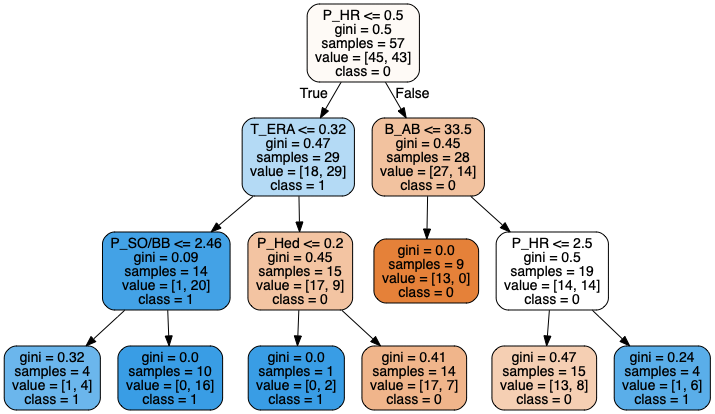

In [35]:
# 在jupyter notebook中查看決策樹圖像 
from IPython.display import Image
Image(filename ='somefile.png')